In [1]:
!pip3 install statsmodels

     |████████████████████████████████| 9.6 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 31.2 MB/s eta 0:00:01


In [40]:
from statsmodels.api import OLS
from statsmodels import api as sm
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib as mp
import scipy.stats as st

mp.style.use('ggplot')

In [4]:
df = pd.read_csv("results.csv")

In [5]:
df

,Subject,num_repos,total_stars,total_issues,max_issues,max_stars,total_pr,max_pr,num_rust,num_ruby,num_go,num_java,num_c,num_cpp,num_fork_and_mod,num_completed,time_to_first_complete,num_causes_found
0,y380445,25,1,1,1,1,13,9,1,2,1,7,4,1,1,1,24,2
1,y286662,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,30,1
2,y869397,30,0,33,9,1,42,12,0,1,1,3,0,1,0,1,17,1
3,y361339,2,0,0,0,0,0,0,0,1,0,0,1,1,0,0,30,0
4,y288358,25,1,0,0,1,0,0,0,3,1,13,1,1,3,2,15,3
5,y840401,4,0,0,0,0,0,0,0,1,0,0,0,0,1,2,10,2


In [9]:
len(df.columns[1:-1])

16

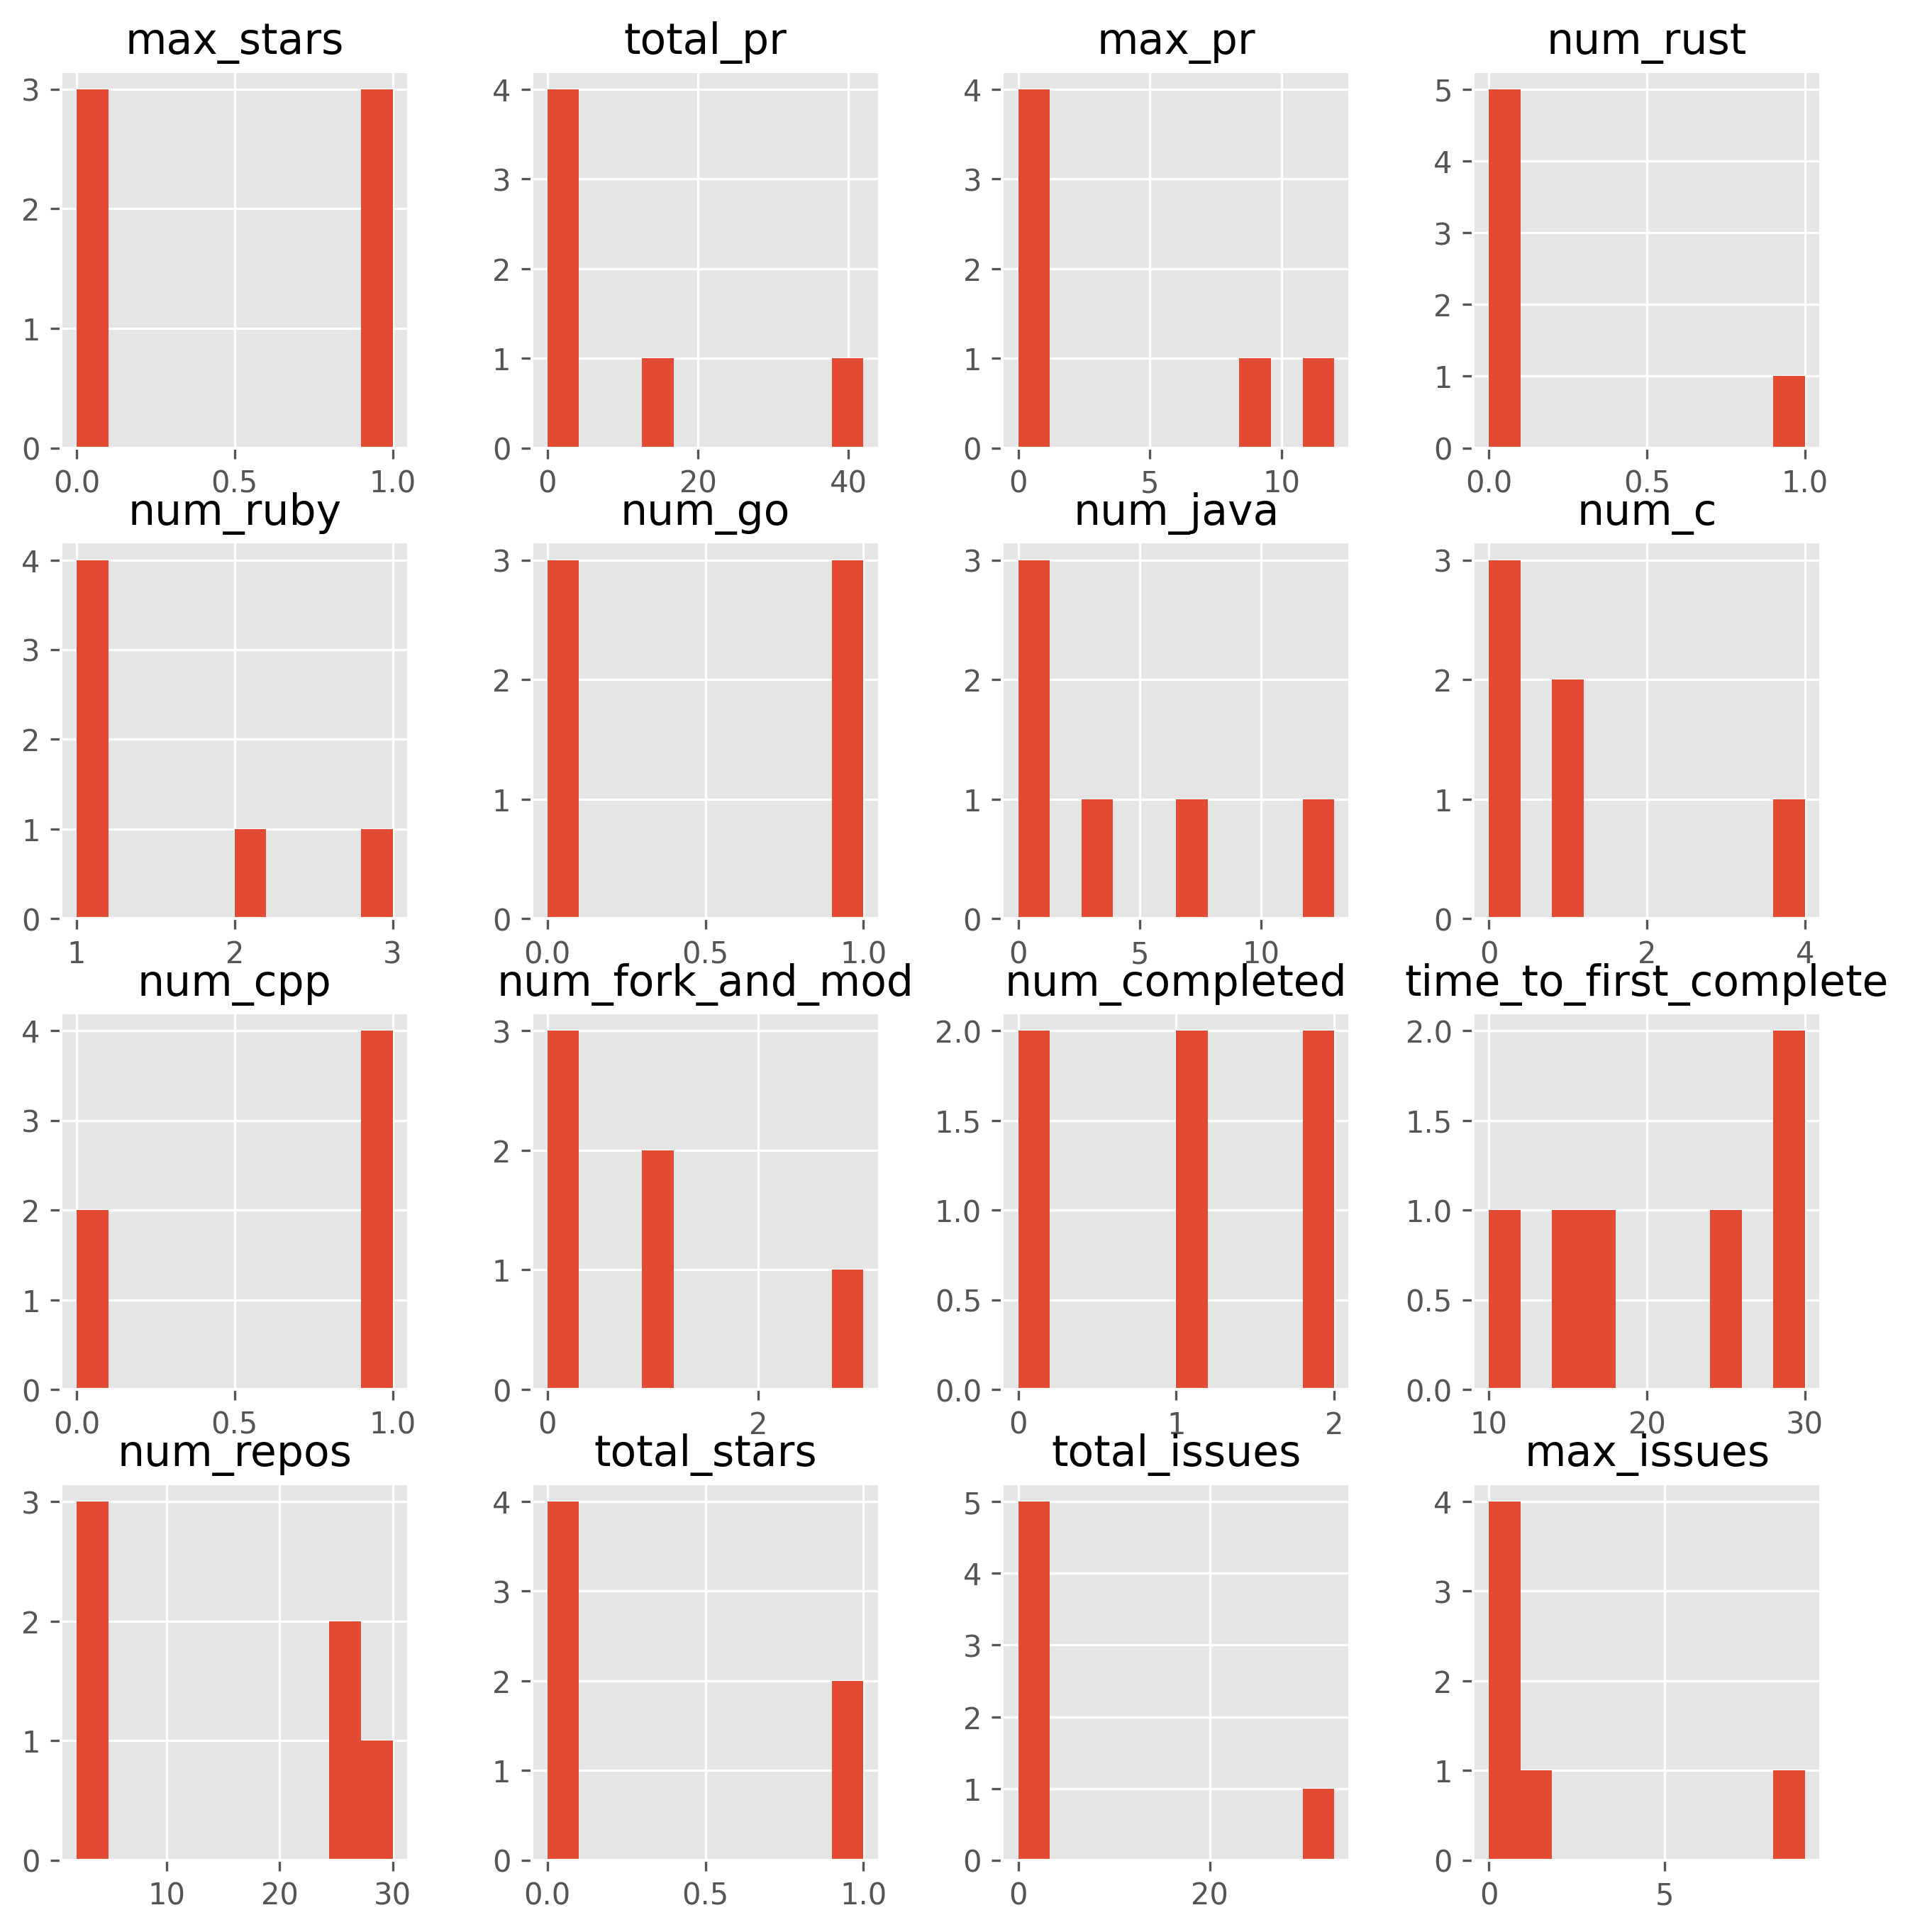

In [17]:
fig, ax = plt.subplots(4, 4, figsize=(9,9), dpi=300)
fig.tight_layout()
for i, col in enumerate(df.columns[1:-1]):
    cur_ax = ax[int(i // 4) - 1][int(i % 4)]
    cur_ax.set_title(col)
    cur_ax.hist(df[col])

In [23]:
for old_langs in ['num_c', 'num_cpp', 'num_java']:
    for new_langs in ['num_go', 'num_ruby', 'num_rust']:
        res = st.spearmanr(df[old_langs], df[new_langs])
        print(old_langs, '-->', new_langs, end=': ')
        print('Spearman rho =', res.correlation, end=' | ')
        if res.pvalue <= 0.05:
            print('p =', res.pvalue, '<= 0.05, therefore CORRELATED.')
        else:
            print('p =', res.pvalue, '> 0.05, therefore UNCORRELATED.')

num_c --> num_go: Spearman rho = 0.42163702135578396 | p = 0.4050233143090605 > 0.05, therefore UNCORRELATED.
num_c --> num_ruby: Spearman rho = 0.7120393247567159 | p = 0.11244298169075352 > 0.05, therefore UNCORRELATED.
num_c --> num_rust: Spearman rho = 0.7071067811865477 | p = 0.11611652351681541 > 0.05, therefore UNCORRELATED.
num_cpp --> num_go: Spearman rho = 0.7071067811865475 | p = 0.11611652351681558 > 0.05, therefore UNCORRELATED.
num_cpp --> num_ruby: Spearman rho = 0.48989794855663565 | p = 0.32394083099184284 > 0.05, therefore UNCORRELATED.
num_cpp --> num_rust: Spearman rho = 0.316227766016838 | p = 0.5414697392755848 > 0.05, therefore UNCORRELATED.
num_java --> num_go: Spearman rho = 0.9332565252573828 | p = 0.006533376338915136 <= 0.05, therefore CORRELATED.
num_java --> num_ruby: Spearman rho = 0.8980265101338745 | p = 0.015067698562847337 <= 0.05, therefore CORRELATED.
num_java --> num_rust: Spearman rho = 0.4173650061841515 | p = 0.4103036364236828 > 0.05, therefore

In [26]:
for langs in ['num_c', 'num_cpp', 'num_java', 'num_go', 'num_ruby', 'num_rust']:
    res = st.spearmanr(df['time_to_first_complete'], df[langs])
    print(langs, ': Spearman r =', res.correlation, end=' | ')
    if res.pvalue <= 0.05:
        print('p =', res.pvalue, '<= 0.05, therefore CORRELATED.')
    else:
        print('p =', res.pvalue, '> 0.05, therefore UNCORRELATED.')

num_c : Spearman r = 0.2035228946026736 | p = 0.6989307768690107 > 0.05, therefore UNCORRELATED.
num_cpp : Spearman r = 0.10502100630210075 | p = 0.8430476505080737 > 0.05, therefore UNCORRELATED.
num_java : Spearman r = -0.33882260699853356 | p = 0.511214635729345 > 0.05, therefore UNCORRELATED.
num_go : Spearman r = -0.2970442628930023 | p = 0.5675384996116584 > 0.05, therefore UNCORRELATED.
num_ruby : Spearman r = -0.2743977362280141 | p = 0.5987336633747982 > 0.05, therefore UNCORRELATED.
num_rust : Spearman r = 0.13284223283101432 | p = 0.8019087881019875 > 0.05, therefore UNCORRELATED.


In [27]:
for i in range(1, 15):
    res = st.pointbiserialr(df['num_completed'] > 0, df[df.columns[i]])
    print(langs, ': point biserial r =', res.correlation, end=' | ')
    if res.pvalue <= 0.05:
        print('p =', res.pvalue, '<= 0.05, therefore CORRELATED.')
    else:
        print('p =', res.pvalue, '> 0.05, therefore UNCORRELATED.')

num_rust : Spearman r = 0.7289313866389098 | p = 0.10025847375959909 > 0.05, therefore UNCORRELATED.
num_rust : Spearman r = 0.49999999999999994 | p = 0.3125 > 0.05, therefore UNCORRELATED.
num_rust : Spearman r = 0.3276509214089724 | p = 0.5261111209116515 > 0.05, therefore UNCORRELATED.
num_rust : Spearman r = 0.3571428571428571 | p = 0.48706268221574356 > 0.05, therefore UNCORRELATED.
num_rust : Spearman r = 0.7071067811865477 | p = 0.11611652351681546 > 0.05, therefore UNCORRELATED.
num_rust : Spearman r = 0.42003093763288724 | p = 0.40700578025134226 > 0.05, therefore UNCORRELATED.
num_rust : Spearman r = 0.49251828131120423 | p = 0.3209587062120278 > 0.05, therefore UNCORRELATED.
num_rust : Spearman r = 0.316227766016838 | p = 0.541469739275585 > 0.05, therefore UNCORRELATED.
num_rust : Spearman r = 0.46291004988627577 | p = 0.3552324305155445 > 0.05, therefore UNCORRELATED.
num_rust : Spearman r = 0.7071067811865477 | p = 0.11611652351681546 > 0.05, therefore UNCORRELATED.
num_r

In [37]:
for i in range(1, 15):
    res = st.spearmanr(df['time_to_first_complete'], df[df.columns[i]])
    print(df.columns[i], ': Spearman r =', res.correlation, end=' | ')
    if abs(res.pvalue) <= 0.05:
        print('p =', res.pvalue, '<= 0.05, therefore CORRELATED.')
    else:
        print('p =', res.pvalue, '> 0.05, therefore UNCORRELATED.')

num_repos : Spearman r = -0.5294117647058824 | p = 0.28007327498473444 > 0.05, therefore UNCORRELATED.
total_stars : Spearman r = -0.2100420126042015 | p = 0.6895702607834964 > 0.05, therefore UNCORRELATED.
total_issues : Spearman r = -0.034299717028501764 | p = 0.9485706007613818 > 0.05, therefore UNCORRELATED.
max_issues : Spearman r = -0.034299717028501764 | p = 0.9485706007613818 > 0.05, therefore UNCORRELATED.
max_stars : Spearman r = -0.2970442628930023 | p = 0.5675384996116584 > 0.05, therefore UNCORRELATED.
total_pr : Spearman r = -0.034299717028501764 | p = 0.9485706007613818 > 0.05, therefore UNCORRELATED.
max_pr : Spearman r = -0.034299717028501764 | p = 0.9485706007613818 > 0.05, therefore UNCORRELATED.
num_rust : Spearman r = 0.13284223283101432 | p = 0.8019087881019875 > 0.05, therefore UNCORRELATED.
num_ruby : Spearman r = -0.2743977362280141 | p = 0.5987336633747982 > 0.05, therefore UNCORRELATED.
num_go : Spearman r = -0.2970442628930023 | p = 0.5675384996116584 > 0.05

In [38]:
for i in range(1, 15):
    res = st.spearmanr(df['num_causes_found'], df[df.columns[i]])
    print(df.columns[i], ': Spearman r =', res.correlation, end=' | ')
    if abs(res.pvalue) <= 0.05:
        print('p =', res.pvalue, '<= 0.05, therefore CORRELATED.')
    else:
        print('p =', res.pvalue, '> 0.05, therefore UNCORRELATED.')

num_repos : Spearman r = 0.492592183071889 | p = 0.3208747476030941 > 0.05, therefore UNCORRELATED.
total_stars : Spearman r = 0.7462025072446364 | p = 0.08844580080910883 > 0.05, therefore UNCORRELATED.
total_issues : Spearman r = -0.06963106238227912 | p = 0.8957222090020535 > 0.05, therefore UNCORRELATED.
max_issues : Spearman r = -0.06963106238227912 | p = 0.8957222090020535 > 0.05, therefore UNCORRELATED.
max_stars : Spearman r = 0.5025189076296059 | p = 0.3096709955795312 > 0.05, therefore UNCORRELATED.
total_pr : Spearman r = -0.06963106238227912 | p = 0.8957222090020535 > 0.05, therefore UNCORRELATED.
max_pr : Spearman r = -0.06963106238227912 | p = 0.8957222090020535 > 0.05, therefore UNCORRELATED.
num_rust : Spearman r = 0.26967994498529685 | p = 0.6052866259760656 > 0.05, therefore UNCORRELATED.
num_ruby : Spearman r = 0.7833494518006401 | p = 0.06532167682878158 > 0.05, therefore UNCORRELATED.
num_go : Spearman r = 0.5025189076296059 | p = 0.3096709955795312 > 0.05, therefo

## Regression for num_completed

In [73]:
min_bic = 1e3
best_x = []
for i in range(2, 15):
    x = df[df.columns[1:i]]
    model = OLS(df['num_completed'], x)
    results = model.fit()
    bic = results.bic
    
    conf = results.conf_int()
    if sum([conf[0][i] < 0 and conf[1][i] > 0 for i in range(len(conf[0]))]) < len(conf[0]):
        # 1+ significant var
        print('BIC =', bic, '| Chosen =', df.columns[1:i].values)
        if bic < min_bic:
            min_bic = bic
            best_x = x
    
    # With constant
    sm.add_constant(x)
    model = OLS(df['num_completed'], x)
    results = model.fit()
    bic = results.bic
    
    conf = results.conf_int()
    if sum([conf[0][i] < 0 and conf[1][i] > 0 for i in range(len(conf[0]))]) < len(conf[0]):
        # 1+ significant var
        print('BIC =', bic, '| Chosen =', df.columns[1:i].values, ' with const')
        if bic < min_bic:
            min_bic = bic
            best_x = x

BIC = 16.59259987258791 | Chosen = ['num_repos']
BIC = 16.59259987258791 | Chosen = ['num_repos']  with const
BIC = -360.9061619585379 | Chosen = ['num_repos' 'total_stars' 'total_issues' 'max_issues' 'max_stars'
 'total_pr' 'max_pr' 'num_rust' 'num_ruby' 'num_go' 'num_java' 'num_c']
BIC = -360.9061619585379 | Chosen = ['num_repos' 'total_stars' 'total_issues' 'max_issues' 'max_stars'
 'total_pr' 'max_pr' 'num_rust' 'num_ruby' 'num_go' 'num_java' 'num_c']  with const
BIC = -358.8999962871544 | Chosen = ['num_repos' 'total_stars' 'total_issues' 'max_issues' 'max_stars'
 'total_pr' 'max_pr' 'num_rust' 'num_ruby' 'num_go' 'num_java' 'num_c'
 'num_cpp']
BIC = -358.8999962871544 | Chosen = ['num_repos' 'total_stars' 'total_issues' 'max_issues' 'max_stars'
 'total_pr' 'max_pr' 'num_rust' 'num_ruby' 'num_go' 'num_java' 'num_c'
 'num_cpp']  with const


/usr/local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [76]:
min_bic

-360.9061619585379

In [75]:
model = OLS(df['num_completed'], best_x)
model.fit().summary()

/usr/local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          num_completed   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 02 Sep 2020   Prob (F-statistic):                nan
Time:                        16:46:57   Log-Likelihood:                 185.83
No. Observations:                   6   AIC:                            -359.7
Df Residuals:                       0   BIC:                            -360.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
num_repos        2.0000        inf          0        nan         nan         nan
total_stars     -0.2737        inf         -0        nan         nan         nan
total_issues     0.6748        inf          0        nan         nan         nan
max_issues       0.0534        inf          0        nan         nan         nan
max_stars       -0.2478        inf         -0        nan         nan         nan
total_pr        -1.2472        inf         -0        nan         nan         nan
max_pr          -1.3055        inf         -0        nan         nan         nan
num_rust        -0.1796        inf         -0        nan         nan         nan
num_ruby        -6.0000        inf         -0        nan         nan         nan
num_go          -0.2478        inf         -0        nan         nan         nan
num_java        -2.4024        inf         -0        nan         nan         nan
num_c            2.0000        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.616
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.812
Skew:                           0.403   Prob(JB):                        0.666
Kurtosis:                       1.389   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

## Regression for time_to_first_complete

In [87]:
model = OLS(df['time_to_first_complete'], df['num_fork_and_mod'])
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                  
Dep. Variable:     time_to_first_complete   R-squared (uncentered):                   0.190
Model:                                OLS   Adj. R-squared (uncentered):              0.028
Method:                     Least Squares   F-statistic:                              1.171
Date:                    Wed, 02 Sep 2020   Prob (F-statistic):                       0.329
Time:                            17:03:27   Log-Likelihood:                         -26.516
No. Observations:                       6   AIC:                                      55.03
Df Residuals:                           5   BIC:                                      54.82
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.

/usr/local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [78]:
model = OLS(df['time_to_first_complete'], best_x)
model.fit().summary()

/usr/local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     time_to_first_complete   R-squared:                       1.000
Model:                                OLS   Adj. R-squared:                    nan
Method:                     Least Squares   F-statistic:                       nan
Date:                    Wed, 02 Sep 2020   Prob (F-statistic):                nan
Time:                            16:49:05   Log-Likelihood:                 172.00
No. Observations:                       6   AIC:                            -332.0
Df Residuals:                           0   BIC:                            -333.2
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
num_repos      -20.0000        inf         -0        nan         nan         nan
total_stars      2.4254        inf          0        nan         nan         nan
total_issues    -6.7589        inf         -0        nan         nan         nan
max_issues      -0.5239        inf         -0        nan         nan         nan
max_stars        2.1656        inf          0        nan         nan         nan
total_pr        12.6739        inf          0        nan         nan         nan
max_pr          13.2107        inf          0        nan         nan         nan
num_rust         1.8143        inf          0        nan         nan         nan
num_ruby        90.0000        inf          0        nan         nan         nan
num_go           2.1656        inf          0        nan         nan         nan
num_java        19.8649        inf          0        nan         nan         nan
num_c          -20.0000        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.753
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.532
Skew:                          -0.538   Prob(JB):                        0.767
Kurtosis:                       2.016   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

In [85]:
model = OLS(df['num_completed'], df['num_fork_and_mod'])
results = model.fit()
results.summary()

/usr/local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          num_completed   R-squared (uncentered):                   0.736
Model:                            OLS   Adj. R-squared (uncentered):              0.684
Method:                 Least Squares   F-statistic:                              13.97
Date:                Wed, 02 Sep 2020   Prob (F-statistic):                      0.0135
Time:                        17:00:17   Log-Likelihood:                         -6.0466
No. Observations:                   6   AIC:                                      14.09
Df Residuals:                       5   BIC:                                      13.88
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
num_fork_and_mod     0.8182      0.219      3.737      0.013       0.255       1.381
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.865
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.573
Skew:                           0.367   Prob(JB):                        0.751
Kurtosis:                       1.676   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
model = OLS(df['num_causes_found'], df['num_fork_and_mod'])
results = model.fit()
results.summary()

/usr/local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       num_causes_found   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.770
Method:                 Least Squares   F-statistic:                              21.12
Date:                Wed, 02 Sep 2020   Prob (F-statistic):                     0.00586
Time:                        17:00:39   Log-Likelihood:                         -7.0113
No. Observations:                   6   AIC:                                      16.02
Df Residuals:                       5   BIC:                                      15.81
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
num_fork_and_mod     1.1818      0.257      4.596      0.006       0.521       1.843
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.877
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.971
Skew:                          -0.877   Prob(JB):                        0.615
Kurtosis:                       2.101   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""